Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [3]:
NAME = ""
IMMATRICULATION_NUMBER = ""

---

## Exercise 9: String assembly with DeBruijn Graphs

Goal of this exercise is to get familar with DeBruijn Graphs and with Hierholzer's Algorithm.

## 1. Study the class Graph

Study the class `Graph` below to get familiar with the different method it provides.

The `self.graph` contains a dictionary that represents the adjacency lists of the graph. For each node `n`, `self.graph[n]` is a list of nodes that are successors of node `n`.

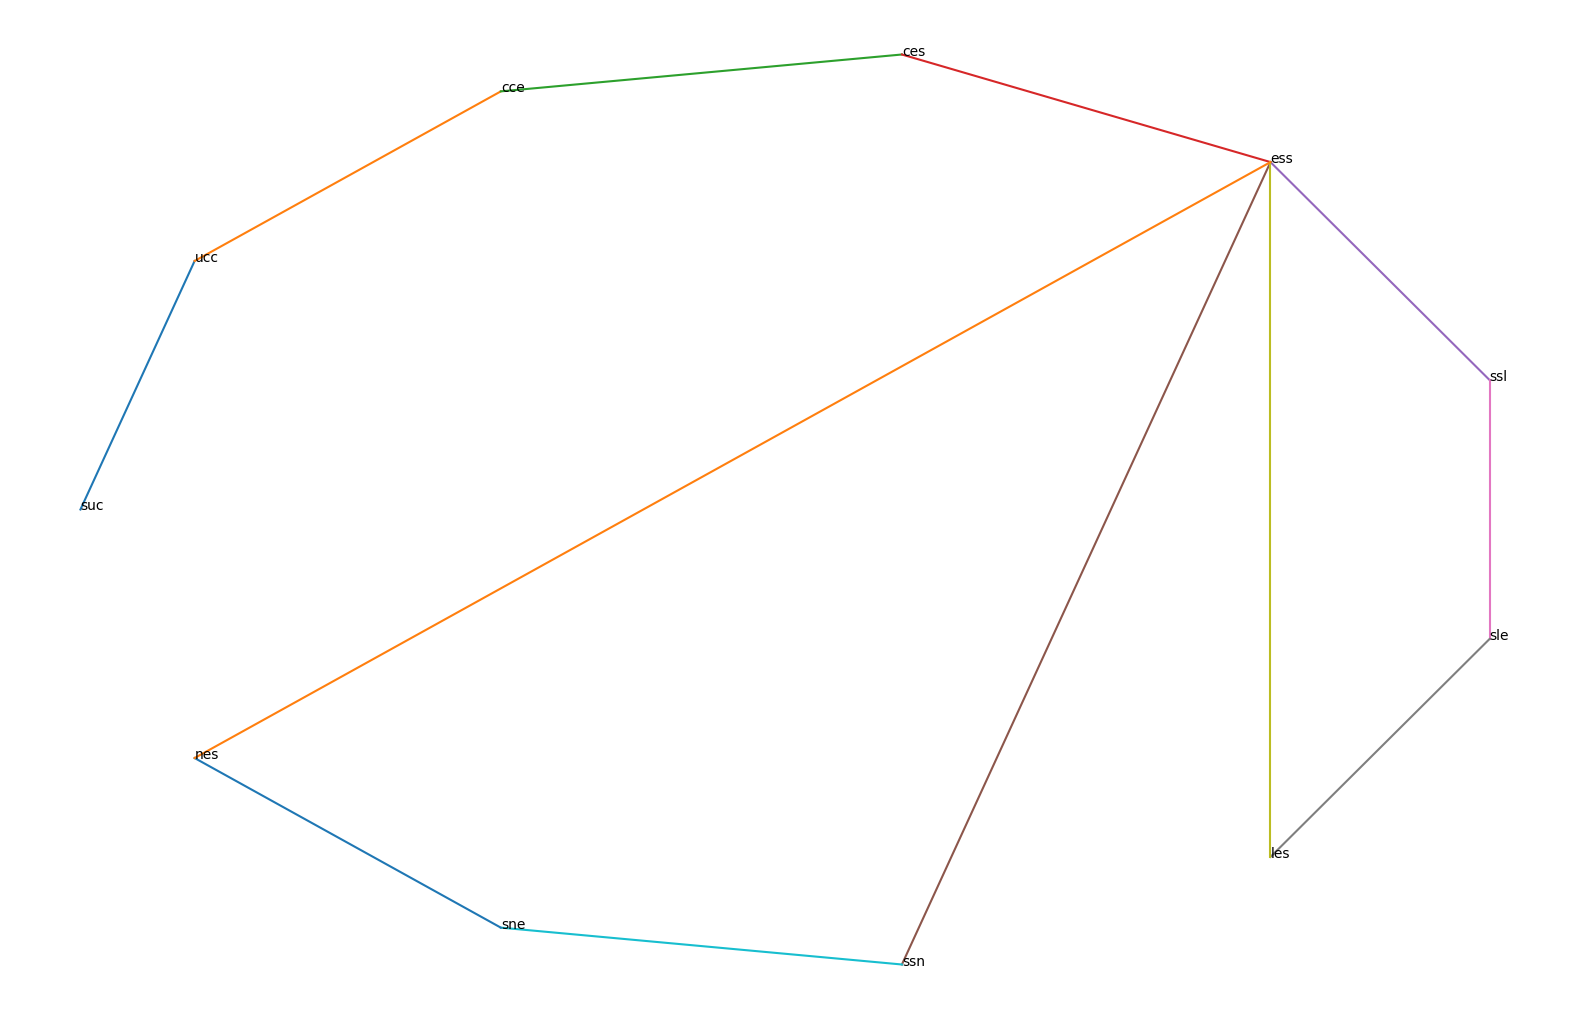

{'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssl', 'ssn'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']}


In [22]:
import matplotlib.pyplot as plt
import math
from collections import Counter

class Graph:
    def __init__(self,g):
        self.graph = g
    
    # Get all nodes of the graph
    def get_nodes(self):
        return self.graph.keys()

    # Get all successor nodes of the given node start
    def get_edges(self, start):
        return self.graph[start]
    
    # Removes *one* edge from start to end
    def remove_edge(self, start, end):
        del self.graph[start][self.graph[start].index(end)]
    
    # Adds an edge from start to end
    def add_edge(self, start, end):
        if not start in self.graph:
            self.graph[start] = []
        self.graph[start].append(end)
        #self.graph[start] = sorted(self.graph[start])
        if not end in self.graph:
            self.graph[end] = []
    
    # Plots the graph
    def plot(self):
        plt.figure(figsize=(20,13))        
        n = len(self.graph)
        x = []
        y = []
        s = []
        ang = 0
        for lab in self.graph:
            x.append(-1 * math.cos(ang))
            y.append(math.sin(ang))
            s.append(lab)
            ang = ang + 2*math.pi / n
            
        # Now as the order is fixed within s, we have to use s instead of the keys of the unordered dictionary
        for lab in s:
            spos = s.index(lab)
            ends = self.graph[lab]
            ends = Counter(ends)
            for e in ends:
                epos = s.index(e)
                for i in range(ends[e]):
                    plt.plot([x[spos],x[epos]],[y[spos]-i*0.015,y[epos]-i*0.015])
        for i in range(len(x)):
            plt.text(x[i], y[i], s[i])
        plt.axis('off')
        plt.show()

g3 = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssl', 'ssn'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
g3.plot()
print(g3.graph)

## 2. Compute the DeBruijn Graph

Implement the method `deBruijn(s)` that computes the DeBruijn Graph for the given parameter `s`. The parameter `s`contains a **list of strings** (i.e. the list of fragments). The parameter `k`is passed as a global variable. A parameter of `k=4` means that each node represents a String of length 3 (i.e., a `3-mer`; in general: `k-1`) and each edge represents a `4-mer` (although the edge labels are not stored in the graph).

For example the DeBruijn Graph for the list `['ALFALFA']` has the following underlying adjacency lists: `{'ALF': ['LFA', 'LFA'], 'LFA': ['FAL'], 'FAL': ['ALF']}` (only the mappings are important, the order does not matter).

In [23]:
k=4

def deBruijn(s):
    global k
    G = Graph({})
    for string in s:
        for i in range(len(string)-k+1):
            G.add_edge(string[i:i+k-1], string[i+1:i+k])
    return G


In [24]:
import copy

def compareGraphs(g1, g2):
    graph1 = copy.deepcopy(g1.graph)
    graph2 = copy.deepcopy(g2.graph)
    
    labs1 = graph1.keys()
    labs2 = graph2.keys()
    if not len(labs1)==len(labs2): return False
    labs1 = sorted(labs1)
    labs2 = sorted(labs2)
    
    for i in range(len(labs1)):
        if not labs1[i]==labs2[i]: return False
        else:
            ends1 = graph1[labs1[i]]
            ends2 = graph2[labs2[i]]
            if not len(ends1)==len(ends2): return False
            ends1 = sorted(ends1)
            ends2 = sorted(ends2)
    
            for j in range(len(ends1)):
                if not ends1[j]==ends2[j]: return False
    
    return True

s0 = ["ALFALFA"]
g0 = Graph({'ALF': ['LFA', 'LFA'], 'LFA': ['FAL'], 'FAL': ['ALF']})
assert compareGraphs(g0, deBruijn(s0))

s1 = ["ABRACADABRA"]
g1 = Graph({'ABR': ['BRA', 'BRA'], 'BRA': ['RAC'], 'RAC': ['ACA'], 'ACA': ['CAD'], 'CAD': ['ADA'], 'ADA': ['DAB'], 'DAB': ['ABR']})
assert compareGraphs(g1, deBruijn(s1))

s2 = ["MISSISSIPPI"]
g2 = Graph({'MIS': ['ISS'], 'ISS': ['SSI', 'SSI'], 'SSI': ['SIS', 'SIP'], 'SIS': ['ISS'], 'SIP': ['IPP'], 'IPP': ['PPI'], 'PPI': []})
assert compareGraphs(g2, deBruijn(s2))

s3 = ["successlessness"]
s3b = ["successnessless"]
g3 = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssl', 'ssn'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
g3b = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssn', 'ssl'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
assert compareGraphs(g3, deBruijn(s3))
assert compareGraphs(g3, deBruijn(s3b))
assert compareGraphs(g3b, deBruijn(s3))
assert compareGraphs(g3b, deBruijn(s3b))

s4 = ["succes","uccess","essles","essnes","sness","slessn"]
g4 = Graph({'suc': ['ucc'], 'ucc': ['cce', 'cce'], 'cce': ['ces', 'ces'], 'ces': ['ess'], 'ess': ['ssl', 'ssn', 'ssn'], 'ssl': ['sle'], 'sle': ['les', 'les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes', 'nes'], 'nes': ['ess']})
assert compareGraphs(g4, deBruijn(s4))

s5 = ["Live_as_if_you_were_to_die_tomorrow._Learn_as_if_you_were_to_live_forever."]
g5 = Graph({'Liv': ['ive'], 'ive': ['ve_', 've_'], 've_': ['e_a', 'e_f'], 'e_a': ['_as'], '_as': ['as_', 'as_'], 'as_': ['s_i', 's_i'], 's_i': ['_if', '_if'], '_if': ['if_', 'if_'], 'if_': ['f_y', 'f_y'], 'f_y': ['_yo', '_yo'], '_yo': ['you', 'you'], 'you': ['ou_', 'ou_'], 'ou_': ['u_w', 'u_w'], 'u_w': ['_we', '_we'], '_we': ['wer', 'wer'], 'wer': ['ere', 'ere'], 'ere': ['re_', 're_'], 're_': ['e_t', 'e_t'], 'e_t': ['_to', '_to', '_to'], '_to': ['to_', 'tom', 'to_'], 'to_': ['o_d', 'o_l'], 'o_d': ['_di'], '_di': ['die'], 'die': ['ie_'], 'ie_': ['e_t'], 'tom': ['omo'], 'omo': ['mor'], 'mor': ['orr'], 'orr': ['rro'], 'rro': ['row'], 'row': ['ow.'], 'ow.': ['w._'], 'w._': ['._L'], '._L': ['_Le'], '_Le': ['Lea'], 'Lea': ['ear'], 'ear': ['arn'], 'arn': ['rn_'], 'rn_': ['n_a'], 'n_a': ['_as'], 'o_l': ['_li'], '_li': ['liv'], 'liv': ['ive'], 'e_f': ['_fo'], '_fo': ['for'], 'for': ['ore'], 'ore': ['rev'], 'rev': ['eve'], 'eve': ['ver'], 'ver': ['er.'], 'er.': []})
assert compareGraphs(g5, deBruijn(s5))

s5b = ["Live_as_if_you_were_tomorrow._Learn_as_if_you_were_to_die_to_live_forever."]
print(deBruijn(s5b).graph)
assert compareGraphs(g5, deBruijn(s5b))

s6 = ["re_to_die_","u_were_to_","e_as_if_yo","orrow._Lea","_to_live_f","forever.","Live_as_if","to_die_tom","s_if_you_w",
  "earn_as_if","row._Learn","s_if_you_w","e_tomorrow","you_were_t","o_live_for","if_you_wer"]
g6 = Graph({'re_': ['e_t', 'e_t', 'e_t'], 'e_t': ['_to', '_to', '_to', '_to'], '_to': ['to_', 'to_', 'to_', 'tom', 'tom'], 'to_': ['o_d', 'o_l', 'o_d'], 'o_d': ['_di', '_di'], '_di': ['die', 'die'], 'die': ['ie_', 'ie_'], 'ie_': ['e_t'], 'u_w': ['_we', '_we', '_we'], '_we': ['wer', 'wer', 'wer'], 'wer': ['ere', 'ere'], 'ere': ['re_', 're_'], 'e_a': ['_as', '_as'], '_as': ['as_', 'as_', 'as_'], 'as_': ['s_i', 's_i', 's_i'], 's_i': ['_if', '_if', '_if', '_if', '_if'], '_if': ['if_', 'if_', 'if_'], 'if_': ['f_y', 'f_y', 'f_y', 'f_y'], 'f_y': ['_yo', '_yo', '_yo', '_yo'], '_yo': ['you', 'you', 'you'], 'orr': ['rro', 'rro'], 'rro': ['row', 'row'], 'row': ['ow.', 'ow.'], 'ow.': ['w._', 'w._'], 'w._': ['._L', '._L'], '._L': ['_Le', '_Le'], '_Le': ['Lea', 'Lea'], 'Lea': ['ear'], 'o_l': ['_li', '_li'], '_li': ['liv', 'liv'], 'liv': ['ive', 'ive'], 'ive': ['ve_', 've_', 've_'], 've_': ['e_f', 'e_a', 'e_f'], 'e_f': ['_fo'], 'for': ['ore'], 'ore': ['rev'], 'rev': ['eve'], 'eve': ['ver'], 'ver': ['er.'], 'er.': [], 'Liv': ['ive'], 'tom': ['omo'], 'you': ['ou_', 'ou_', 'ou_', 'ou_'], 'ou_': ['u_w', 'u_w', 'u_w', 'u_w'], 'ear': ['arn', 'arn'], 'arn': ['rn_'], 'rn_': ['n_a'], 'n_a': ['_as'], 'omo': ['mor'], 'mor': ['orr'], '_fo': ['for']})
assert compareGraphs(g6, deBruijn(s6))

{'Liv': ['ive'], 'ive': ['ve_', 've_'], 've_': ['e_a', 'e_f'], 'e_a': ['_as'], '_as': ['as_', 'as_'], 'as_': ['s_i', 's_i'], 's_i': ['_if', '_if'], '_if': ['if_', 'if_'], 'if_': ['f_y', 'f_y'], 'f_y': ['_yo', '_yo'], '_yo': ['you', 'you'], 'you': ['ou_', 'ou_'], 'ou_': ['u_w', 'u_w'], 'u_w': ['_we', '_we'], '_we': ['wer', 'wer'], 'wer': ['ere', 'ere'], 'ere': ['re_', 're_'], 're_': ['e_t', 'e_t'], 'e_t': ['_to', '_to', '_to'], '_to': ['tom', 'to_', 'to_'], 'tom': ['omo'], 'omo': ['mor'], 'mor': ['orr'], 'orr': ['rro'], 'rro': ['row'], 'row': ['ow.'], 'ow.': ['w._'], 'w._': ['._L'], '._L': ['_Le'], '_Le': ['Lea'], 'Lea': ['ear'], 'ear': ['arn'], 'arn': ['rn_'], 'rn_': ['n_a'], 'n_a': ['_as'], 'to_': ['o_d', 'o_l'], 'o_d': ['_di'], '_di': ['die'], 'die': ['ie_'], 'ie_': ['e_t'], 'o_l': ['_li'], '_li': ['liv'], 'liv': ['ive'], 'e_f': ['_fo'], '_fo': ['for'], 'for': ['ore'], 'ore': ['rev'], 'rev': ['eve'], 'eve': ['ver'], 'ver': ['er.'], 'er.': []}


<i>**Hint:** From now on, we do not consider overlapping string fragments but the string itself as input, such that the original string can be computed by Hierholzer's algorithm without having to consider the coverage of the overlapping fragments</i>

## 3. Compute the start and end node of the Eulerian Path

Implement the method `get_start_and_end_node(graph)` that computes a pair `start,end` that are the start and end node of an eulerian path. The start node of the eulerian path is that node that has a higher out-degree than in-degree (i.e., out-degree = in-degree + 1). The end node of the eulerian path is that node that has a higher in-degree than out-degree (i.e., indegree = out-degree + 1).

If no start and end node with the described property can be found, as for each node out-degree=in-degree holds, you have to return the pair `","`. In this case, each node v can be the start node of an eulerian path and each node of which v is a successor can be the end node of an eulerian path.

In [25]:
def get_start_and_end_node(graph):
    in_degs = {}
    out_degs = {}
    for node in graph.get_nodes():
        in_degs[node] = 0
        out_degs[node] = 0
    for node in graph.get_nodes():
        for edge in graph.get_edges(node):
            in_degs[edge] += 1
            out_degs[node] += 1
    start = None
    end = None
    for node in graph.get_nodes():
        if in_degs[node] < out_degs[node]:
            if start is not None or (out_degs[node] - in_degs[node]) != 1:
                return "", ""
            start = node
        elif in_degs[node] > out_degs[node]:
            if end is not None or (in_degs[node] - out_degs[node]) != 1:
                return "", ""
            end = node
    if start is None or end is None:
        return "", ""
    return start, end



In [26]:
g0 = Graph({'ALF': ['LFA', 'LFA'], 'LFA': ['FAL'], 'FAL': ['ALF']})
assert get_start_and_end_node(g0)==('ALF', 'LFA')

g1 = Graph({'ABR': ['BRA', 'BRA'], 'BRA': ['RAC'], 'RAC': ['ACA'], 'ACA': ['CAD'], 'CAD': ['ADA'], 'ADA': ['DAB'], 'DAB': ['ABR']})
assert get_start_and_end_node(g1)==('ABR', 'BRA')

g2 = Graph({'MIS': ['ISS'], 'ISS': ['SSI', 'SSI'], 'SSI': ['SIS', 'SIP'], 'SIS': ['ISS'], 'SIP': ['IPP'], 'IPP': ['PPI'], 'PPI': []})
assert get_start_and_end_node(g2)==('MIS', 'PPI')

g3 = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssl', 'ssn'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
assert get_start_and_end_node(g3)==('suc', 'ess')

g3b = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssn', 'ssl'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
assert get_start_and_end_node(g3b)==('suc', 'ess')

g5 = Graph({'Liv': ['ive'], 'ive': ['ve_', 've_'], 've_': ['e_a', 'e_f'], 'e_a': ['_as'], '_as': ['as_', 'as_'], 'as_': ['s_i', 's_i'], 's_i': ['_if', '_if'], '_if': ['if_', 'if_'], 'if_': ['f_y', 'f_y'], 'f_y': ['_yo', '_yo'], '_yo': ['you', 'you'], 'you': ['ou_', 'ou_'], 'ou_': ['u_w', 'u_w'], 'u_w': ['_we', '_we'], '_we': ['wer', 'wer'], 'wer': ['ere', 'ere'], 'ere': ['re_', 're_'], 're_': ['e_t', 'e_t'], 'e_t': ['_to', '_to', '_to'], '_to': ['to_', 'tom', 'to_'], 'to_': ['o_d', 'o_l'], 'o_d': ['_di'], '_di': ['die'], 'die': ['ie_'], 'ie_': ['e_t'], 'tom': ['omo'], 'omo': ['mor'], 'mor': ['orr'], 'orr': ['rro'], 'rro': ['row'], 'row': ['ow.'], 'ow.': ['w._'], 'w._': ['._L'], '._L': ['_Le'], '_Le': ['Lea'], 'Lea': ['ear'], 'ear': ['arn'], 'arn': ['rn_'], 'rn_': ['n_a'], 'n_a': ['_as'], 'o_l': ['_li'], '_li': ['liv'], 'liv': ['ive'], 'e_f': ['_fo'], '_fo': ['for'], 'for': ['ore'], 'ore': ['rev'], 'rev': ['eve'], 'eve': ['ver'], 'ver': ['er.'], 'er.': []})
assert get_start_and_end_node(g5)==('Liv', 'er.')

g7 = Graph({'AUS': ['USD'], 'USD': ['SDI'], 'SDI': ['DIE'], 'DIE': ['IEM'], 'IEM': ['EMA'], 'EMA': ['MAU'], 'MAU': ['AUS']})
assert get_start_and_end_node(g7)==('','')

## 4. Compute the Eulerian Path with the help of Hierholzer's algorithm

Implement the method `hierholzer(graph)` that computes a eulerian path with the help of Hierholzer's algorithm. Output is the eulerian path represented by a list of node labels. 

Perform the following steps (work on a copy of the given graph in order to not modify the graph itself):
* Compute the start and end node of the eulerian path
* If a single start and end node exists (i.e., start and end are not ""), add an edge from end to start in order to produce a eulerian cycle
* If no single start and end node exists, chose a start node randomly. In this case, already a eulerian cycle exists, and no edge has to be added.
* Perform Hierholzer's algorithm on the graph:
    * Start with an empty path p_c
    * Randomly chose an edge from the current node c to one of its successors s
    * Add the successor s to the path p_c
    * Remove the edge from c to s from the graph
    * Stop as soon as you reach the start node again
    
    * Check your path, whether a node u exists (at position p) that still has outgoing edges. If yes:
       * Perform Hierholzer's algorithm with u as start node, return value is a path p_u
       * Insert p_u at position p into the path p_c
    * Repeat the last steps, until no such node u exists
    
* p_c now contains a eulerian cycle
* If an edge from end to start was added, remove this edge from p_c and return the path starting at node start and ending at node end as result
* Otherwise, you can chose any path from the cycle p_c and return it as result

In [31]:
def hierholzer(graph):
    g = copy.deepcopy(graph)
    start, end = get_start_and_end_node(g)
    if start and end:
        g.add_edge(end, start)
    else:
        start = list(g.get_nodes())[0]
    current = start
    path = [current]
    outer = True
    inner = True
    while outer:
        while inner:
            if len(g.get_edges(current)) == 0:
                inner = False
            else:
                next = g.get_edges(current)[0]
                g.remove_edge(current, next)
                path.append(next)
                current = next
        outer = False
        for node in path:
            if len(g.get_edges(node)) > 0:
                outer = True
                current = node
                break
    print(path)
    return path[:-1]





In [32]:
g0 = Graph({'ALF': ['LFA', 'LFA'], 'LFA': ['FAL'], 'FAL': ['ALF']})
assert hierholzer(g0)==['ALF', 'LFA', 'FAL', 'ALF', 'LFA']

g1 = Graph({'ABR': ['BRA', 'BRA'], 'BRA': ['RAC'], 'RAC': ['ACA'], 'ACA': ['CAD'], 'CAD': ['ADA'], 'ADA': ['DAB'], 'DAB': ['ABR']})
assert hierholzer(g1)==['ABR', 'BRA', 'RAC', 'ACA', 'CAD', 'ADA', 'DAB', 'ABR', 'BRA']

g2 = Graph({'MIS': ['ISS'], 'ISS': ['SSI', 'SSI'], 'SSI': ['SIS', 'SIP'], 'SIS': ['ISS'], 'SIP': ['IPP'], 'IPP': ['PPI'], 'PPI': []})
assert hierholzer(g2)==['MIS', 'ISS', 'SSI', 'SIS', 'ISS', 'SSI', 'SIP', 'IPP', 'PPI']

g3 = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssl', 'ssn'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
hh=hierholzer(g3)
assert hh==['suc', 'ucc', 'cce', 'ces', 'ess', 'ssl', 'sle', 'les', 'ess', 'ssn', 'sne', 'nes', 'ess'] or hh==['suc', 'ucc', 'cce', 'ces', 'ess', 'ssn', 'sne', 'nes', 'ess', 'ssl', 'sle', 'les', 'ess']

g3b = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssn', 'ssl'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
hh = hierholzer(g3b)
assert hh==['suc', 'ucc', 'cce', 'ces', 'ess', 'ssl', 'sle', 'les', 'ess', 'ssn', 'sne', 'nes', 'ess'] or hh==['suc', 'ucc', 'cce', 'ces', 'ess', 'ssn', 'sne', 'nes', 'ess', 'ssl', 'sle', 'les', 'ess']

g5 = Graph({'Liv': ['ive'], 'ive': ['ve_', 've_'], 've_': ['e_a', 'e_f'], 'e_a': ['_as'], '_as': ['as_', 'as_'], 'as_': ['s_i', 's_i'], 's_i': ['_if', '_if'], '_if': ['if_', 'if_'], 'if_': ['f_y', 'f_y'], 'f_y': ['_yo', '_yo'], '_yo': ['you', 'you'], 'you': ['ou_', 'ou_'], 'ou_': ['u_w', 'u_w'], 'u_w': ['_we', '_we'], '_we': ['wer', 'wer'], 'wer': ['ere', 'ere'], 'ere': ['re_', 're_'], 're_': ['e_t', 'e_t'], 'e_t': ['_to', '_to', '_to'], '_to': ['to_', 'tom', 'to_'], 'to_': ['o_d', 'o_l'], 'o_d': ['_di'], '_di': ['die'], 'die': ['ie_'], 'ie_': ['e_t'], 'tom': ['omo'], 'omo': ['mor'], 'mor': ['orr'], 'orr': ['rro'], 'rro': ['row'], 'row': ['ow.'], 'ow.': ['w._'], 'w._': ['._L'], '._L': ['_Le'], '_Le': ['Lea'], 'Lea': ['ear'], 'ear': ['arn'], 'arn': ['rn_'], 'rn_': ['n_a'], 'n_a': ['_as'], 'o_l': ['_li'], '_li': ['liv'], 'liv': ['ive'], 'e_f': ['_fo'], '_fo': ['for'], 'for': ['ore'], 'ore': ['rev'], 'rev': ['eve'], 'eve': ['ver'], 'ver': ['er.'], 'er.': []})
s5a = ['Liv', 'ive', 've_', 'e_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_d', '_di', 'die', 'ie_', 'e_t', '_to', 'tom', 'omo', 'mor', 'orr', 'rro', 'row', 'ow.', 'w._', '._L', '_Le', 'Lea', 'ear', 'arn', 'rn_', 'n_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_l', '_li', 'liv', 'ive', 've_', 'e_f', '_fo', 'for', 'ore', 'rev', 'eve', 'ver', 'er.']
s5b = ['Liv', 'ive', 've_', 'e_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'tom', 'omo', 'mor', 'orr', 'rro', 'row', 'ow.', 'w._', '._L', '_Le', 'Lea', 'ear', 'arn', 'rn_', 'n_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_d', '_di', 'die', 'ie_', 'e_t', '_to', 'to_', 'o_l', '_li', 'liv', 'ive', 've_', 'e_f', '_fo', 'for', 'ore', 'rev', 'eve', 'ver', 'er.']
hg5 = hierholzer(g5)
assert hg5==s5a or hg5==s5b


['ALF', 'LFA', 'FAL', 'ALF', 'LFA', 'ALF']
['ABR', 'BRA', 'RAC', 'ACA', 'CAD', 'ADA', 'DAB', 'ABR', 'BRA', 'ABR']
['MIS', 'ISS', 'SSI', 'SIS', 'ISS', 'SSI', 'SIP', 'IPP', 'PPI', 'MIS']
['suc', 'ucc', 'cce', 'ces', 'ess', 'ssl', 'sle', 'les', 'ess', 'ssn', 'sne', 'nes', 'ess', 'suc']
['suc', 'ucc', 'cce', 'ces', 'ess', 'ssn', 'sne', 'nes', 'ess', 'ssl', 'sle', 'les', 'ess', 'suc']
['Liv', 'ive', 've_', 'e_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_d', '_di', 'die', 'ie_', 'e_t', '_to', 'tom', 'omo', 'mor', 'orr', 'rro', 'row', 'ow.', 'w._', '._L', '_Le', 'Lea', 'ear', 'arn', 'rn_', 'n_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_l', '_li', 'liv', 'ive', 've_', 'e_f', '_fo', 'for', 'ore', 'rev', 'eve', 'ver', 'er.', 'Liv']


## 5. Read the string from the eulerian path

Implement a method `path_to_string(path)` that reads the string from the output of the previous path. Therefore, you have to concatenate the first letters of all elements of the path plus the remaining letters of the last element of the path.

In [33]:
def path_to_string(path):
    return "".join([node[0] for node in path[:-1]]) + path[-1]
    
    
print(path_to_string(['Liv', 'ive', 've_', 'e_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'tom', 'omo', 'mor', 'orr', 'rro', 'row', 'ow.', 'w._', '._L', '_Le', 'Lea', 'ear', 'arn', 'rn_', 'n_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_d', '_di', 'die', 'ie_', 'e_t', '_to', 'to_', 'o_l', '_li', 'liv', 'ive', 've_', 'e_f', '_fo', 'for', 'ore', 'rev', 'eve', 'ver', 'er.']))


Live_as_if_you_were_tomorrow._Learn_as_if_you_were_to_die_to_live_forever.


In [34]:
s0 = ["ALFALFA"]
g0 = Graph({'ALF': ['LFA', 'LFA'], 'LFA': ['FAL'], 'FAL': ['ALF']})

s1 = ["ABRACADABRA"]
g1 = Graph({'ABR': ['BRA', 'BRA'], 'BRA': ['RAC'], 'RAC': ['ACA'], 'ACA': ['CAD'], 'CAD': ['ADA'], 'ADA': ['DAB'], 'DAB': ['ABR']})

s2 = ["MISSISSIPPI"]
g2 = Graph({'MIS': ['ISS'], 'ISS': ['SSI', 'SSI'], 'SSI': ['SIS', 'SIP'], 'SIS': ['ISS'], 'SIP': ['IPP'], 'IPP': ['PPI'], 'PPI': []})

s3 = ["successlessness"]
s3b = ["successnessless"]
g3 = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssl', 'ssn'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})
g3b = Graph({'suc': ['ucc'], 'ucc': ['cce'], 'cce': ['ces'], 'ces': ['ess'], 'ess': ['ssn', 'ssl'], 'ssl': ['sle'], 'sle': ['les'], 'les': ['ess'], 'ssn': ['sne'], 'sne': ['nes'], 'nes': ['ess']})

s5 = ["Live_as_if_you_were_to_die_tomorrow._Learn_as_if_you_were_to_live_forever."]
s5b = ["Live_as_if_you_were_tomorrow._Learn_as_if_you_were_to_die_to_live_forever."]

g5 = Graph({'Liv': ['ive'], 'ive': ['ve_', 've_'], 've_': ['e_a', 'e_f'], 'e_a': ['_as'], '_as': ['as_', 'as_'], 'as_': ['s_i', 's_i'], 's_i': ['_if', '_if'], '_if': ['if_', 'if_'], 'if_': ['f_y', 'f_y'], 'f_y': ['_yo', '_yo'], '_yo': ['you', 'you'], 'you': ['ou_', 'ou_'], 'ou_': ['u_w', 'u_w'], 'u_w': ['_we', '_we'], '_we': ['wer', 'wer'], 'wer': ['ere', 'ere'], 'ere': ['re_', 're_'], 're_': ['e_t', 'e_t'], 'e_t': ['_to', '_to', '_to'], '_to': ['to_', 'tom', 'to_'], 'to_': ['o_d', 'o_l'], 'o_d': ['_di'], '_di': ['die'], 'die': ['ie_'], 'ie_': ['e_t'], 'tom': ['omo'], 'omo': ['mor'], 'mor': ['orr'], 'orr': ['rro'], 'rro': ['row'], 'row': ['ow.'], 'ow.': ['w._'], 'w._': ['._L'], '._L': ['_Le'], '_Le': ['Lea'], 'Lea': ['ear'], 'ear': ['arn'], 'arn': ['rn_'], 'rn_': ['n_a'], 'n_a': ['_as'], 'o_l': ['_li'], '_li': ['liv'], 'liv': ['ive'], 'e_f': ['_fo'], '_fo': ['for'], 'for': ['ore'], 'ore': ['rev'], 'rev': ['eve'], 'eve': ['ver'], 'ver': ['er.'], 'er.': []})

assert path_to_string(hierholzer(g0))==s0[0]
assert path_to_string(hierholzer(g1))==s1[0]
assert path_to_string(hierholzer(g2))==s2[0]
hh = hierholzer(g3)
assert path_to_string(hh)==s3[0] or path_to_string(hh)==s3b[0]
hh = hierholzer(g3b)
assert path_to_string(hh)==s3[0] or path_to_string(hh)==s3b[0]
g5r = path_to_string(hierholzer(g5))
assert g5r==s5[0] or g5r==s5b[0]

['ALF', 'LFA', 'FAL', 'ALF', 'LFA', 'ALF']
['ABR', 'BRA', 'RAC', 'ACA', 'CAD', 'ADA', 'DAB', 'ABR', 'BRA', 'ABR']
['MIS', 'ISS', 'SSI', 'SIS', 'ISS', 'SSI', 'SIP', 'IPP', 'PPI', 'MIS']
['suc', 'ucc', 'cce', 'ces', 'ess', 'ssl', 'sle', 'les', 'ess', 'ssn', 'sne', 'nes', 'ess', 'suc']
['suc', 'ucc', 'cce', 'ces', 'ess', 'ssn', 'sne', 'nes', 'ess', 'ssl', 'sle', 'les', 'ess', 'suc']
['Liv', 'ive', 've_', 'e_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_d', '_di', 'die', 'ie_', 'e_t', '_to', 'tom', 'omo', 'mor', 'orr', 'rro', 'row', 'ow.', 'w._', '._L', '_Le', 'Lea', 'ear', 'arn', 'rn_', 'n_a', '_as', 'as_', 's_i', '_if', 'if_', 'f_y', '_yo', 'you', 'ou_', 'u_w', '_we', 'wer', 'ere', 're_', 'e_t', '_to', 'to_', 'o_l', '_li', 'liv', 'ive', 've_', 'e_f', '_fo', 'for', 'ore', 'rev', 'eve', 'ver', 'er.', 'Liv']
